<h2>Importing Libraries</h2>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, chi2_contingency

<h2>2.1. Import the dataset </h2>

In [7]:
# Import the Dataset
df = pd.read_csv("/Users/girish33/Smart Data Discovery Project/Customer Service_Requests_from_2010_to_Present.csv")

/var/folders/zv/2_fq54tx3ybgmlr6n1lmkw740000gn/T/ipykernel_5769/71495355.py:2: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/girish33/Smart Data Discovery Project/Customer Service_Requests_from_2010_to_Present.csv")


<h3>Solution to the Warning</h3>

In [10]:
# Importing dataset with explicit data types for consistency and to suppress DtypeWarning.
# Specifying 'Ferry Direction' and 'Ferry Terminal Name' as strings.
# Setting low_memory=False to ensure full type inference on large dataset.

df = pd.read_csv(
    "/Users/girish33/Smart Data Discovery Project/Customer Service_Requests_from_2010_to_Present.csv",
    dtype={"Ferry Direction": str, "Ferry Terminal Name": str},
    low_memory=False
)

df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


<h2>2.2. Provide your insight on the information and details that the provided dataset carries.</h2>

In [13]:
#Summary of DataFrame structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [15]:
# Displaying the first 5 rows of the DataFrame
df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [17]:
#Displaying the last 5 rows of the DataFrame
df.tail(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"
300697,30281825,03/29/2015 12:33:01 AM,03/29/2015 04:41:50 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)"


<h2>2.3. Convert the columns "Created Date" and "Closed Date" to datetime datatype and create a new column "Request_Closing_Time" as the time elapsed between request creation and request closing</h2>

<h3>Before</h3>

In [21]:
# Displaying data before conversion.

print(f"Data Before Conversion\n")

# Checking data types of 'Created Date' and 'Closed Date' columns
print(f"Data Types of Columns Before Conversion:\n{df[["Created Date", "Closed Date"]].dtypes}\n")

# Displaying the rows of the date columns for format inspection before conversion
print(f"Displaying Data Before Conversion:\n")
df[["Created Date", "Closed Date"]]

Data Before Conversion

Data Types of Columns Before Conversion:
Created Date    object
Closed Date     object
dtype: object

Displaying Data Before Conversion:



,Created Date,Closed Date
0,12/31/2015 11:59:45 PM,01-01-16 0:55
1,12/31/2015 11:59:44 PM,01-01-16 1:26
2,12/31/2015 11:59:29 PM,01-01-16 4:51
3,12/31/2015 11:57:46 PM,01-01-16 7:43
4,12/31/2015 11:56:58 PM,01-01-16 3:24
...,...,...
300693,03/29/2015 12:33:41 AM,NaN
300694,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM
300695,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM
300696,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM


<h3>During</h3>

In [24]:
# Converting 'Created Date' and 'Closed Date' columns to datetime format.
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

/var/folders/zv/2_fq54tx3ybgmlr6n1lmkw740000gn/T/ipykernel_5769/2584421501.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created Date'] = pd.to_datetime(df['Created Date'])
/var/folders/zv/2_fq54tx3ybgmlr6n1lmkw740000gn/T/ipykernel_5769/2584421501.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Closed Date'] = pd.to_datetime(df['Closed Date'])


<h3>Solution to the Warning</h3>

In [27]:
# Converting 'Created Date' and 'Closed Date' columns to datetime with specified format and error handling.
df['Created Date'] = pd.to_datetime(df['Created Date'], format='%Y-%m-%d', errors='coerce')
df['Closed Date'] = pd.to_datetime(df['Closed Date'], format='%Y-%m-%d', errors='coerce')

# Calculating the time difference between 'Closed Date' and 'Created Date', and storing it in 'Request_Closing_Time'.
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']

<h3>After</h3>

In [30]:
# Displaying data after conversion.

print(f"Data After Conversion\n")

# Verifying datetime conversion and new column data types
print(f"Data Types of Columns After Conversion:\n{df[["Created Date", "Closed Date", "Request_Closing_Time"]].dtypes}\n")

# Displaying the date columns and the new 'Request_Closing_Time' column
print(f"Displaying Data After Conversion:\n")
df[["Created Date", "Closed Date", "Request_Closing_Time"]]

Data After Conversion

Data Types of Columns After Conversion:
Created Date             datetime64[ns]
Closed Date              datetime64[ns]
Request_Closing_Time    timedelta64[ns]
dtype: object

Displaying Data After Conversion:



,Created Date,Closed Date,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,0 days 00:55:15
1,2015-12-31 23:59:44,2016-01-01 01:26:00,0 days 01:26:16
2,2015-12-31 23:59:29,2016-01-01 04:51:00,0 days 04:51:31
3,2015-12-31 23:57:46,2016-01-01 07:43:00,0 days 07:45:14
4,2015-12-31 23:56:58,2016-01-01 03:24:00,0 days 03:27:02
...,...,...,...
300693,2015-03-29 00:33:41,NaT,NaT
300694,2015-03-29 00:33:28,2015-03-29 02:33:59,0 days 02:00:31
300695,2015-03-29 00:33:03,2015-03-29 03:40:20,0 days 03:07:17
300696,2015-03-29 00:33:02,2015-03-29 04:38:35,0 days 04:05:33


<h2>2.4.Write a python program to drop irrelevant Columns which are listed below.</h2>

<h3>Before</h3>

In [34]:
# Displaying the number of columns before dropping irrelevant ones.
print(f"No. of Columns Before Dropping Irrelevant Columns: {df.shape[1]}\n")

No. of Columns Before Dropping Irrelevant Columns: 54



<h3>During</h3>

In [37]:
# Defining the list of irrelevant columns to drop.
irrelevant_columns = ['Agency Name', 'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 
                      'Intersection Street 2', 'Address Type', 'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
                      'School Region', 'School Code', 'School Phone Number', 'School Address', 'School City', 'School State', 'School Zip',
                      'School Not Found', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
                      'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 
                      'Ferry Direction', 'Ferry Terminal Name', 'Landmark', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
                      'Due Date', 'Resolution Action Updated Date', 'Community Board', 'Facility Type', 'Location']

# Dropping the irrelevant columns from the DataFrame.
df.drop(columns=irrelevant_columns, inplace=True)

<h3>After</h3>

In [40]:
# Displaying the number of columns after dropping irrelevant ones.
print(f"No. of Columns After Dropping Irrelevant Columns: {df.shape[1]}\n")

# Displaying updated DataFrame structure and data types.
df.info()

No. of Columns After Dropping Irrelevant Columns: 15

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              300698 non-null  int64          
 1   Created Date            300698 non-null  datetime64[ns] 
 2   Closed Date             298534 non-null  datetime64[ns] 
 3   Agency                  300698 non-null  object         
 4   Complaint Type          300698 non-null  object         
 5   Descriptor              294784 non-null  object         
 6   Location Type           300567 non-null  object         
 7   Incident Zip            298083 non-null  float64        
 8   City                    298084 non-null  object         
 9   Status                  300698 non-null  object         
 10  Resolution Description  300698 non-null  object         
 11  Borough                 

<h2>2.5. Write a python program to remove the NaN missing values from updated dataframe.</h2>

<h3>Before</h3>

In [44]:
# Summary of missing values before cleaning
print(f"Data Before Dropping NaN Values:\n")
print(f"Total Rows: {df.shape[0]}\n")
print(f"Missing Values Per Column:\n{df.isna().sum()}")

Data Before Dropping NaN Values:

Total Rows: 300698

Missing Values Per Column:
Unique Key                   0
Created Date                 0
Closed Date               2164
Agency                       0
Complaint Type               0
Descriptor                5914
Location Type              131
Incident Zip              2615
City                      2614
Status                       0
Resolution Description       0
Borough                      0
Latitude                  3540
Longitude                 3540
Request_Closing_Time      2164
dtype: int64


<h3>During</h3>

In [47]:
# Dropping rows with missing (NaN) values from the dataset.
df.dropna(inplace=True)

<h3>After</h3>

In [50]:
# Checking dataset shape and missing values after dropping NaNs
print(f"Data After Dropping NaN Values:\n")
print(f"Total Rows: {df.shape[0]}\n")
print(f"Missing Values Per Column:\n{df.isna().sum()}")

Data After Dropping NaN Values:

Total Rows: 291107

Missing Values Per Column:
Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Status                    0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
Request_Closing_Time      0
dtype: int64


<h2>2.6. Write a python program to see the unique values from all the columns in the dataframe.</h2>

In [53]:
# Extract unique values for each column using lambda function
df_unique = df.apply(lambda col: col.unique())

# Counting the number of unique values per column
df_unique_counts = df.nunique()

# Creating a summary DataFrame of columns, their unique values, and counts
df_unique_values = pd.DataFrame({
    'Column': df_unique.index,
    'Unique Values': df_unique.values,
    'Number of Unique Values': df_unique_counts.values
})

# Displaying the summary DataFrame
df_unique_values

,Column,Unique Values,Number of Unique Values
0,Unique Key,"[32310363, 32309934, 32309159, 32305098, 32306...",291107
1,Created Date,"[2015-12-31 23:59:45, 2015-12-31 23:59:44, 201...",251970
2,Closed Date,"[2016-01-01 00:55:00, 2016-01-01 01:26:00, 201...",231991
3,Agency,[NYPD],1
4,Complaint Type,"[Noise - Street/Sidewalk, Blocked Driveway, Il...",15
5,Descriptor,"[Loud Music/Party, No Access, Commercial Overn...",41
6,Location Type,"[Street/Sidewalk, Club/Bar/Restaurant, Store/C...",14
7,Incident Zip,"[10034.0, 11105.0, 10458.0, 10461.0, 11373.0, ...",200
8,City,"[NEW YORK, ASTORIA, BRONX, ELMHURST, BROOKLYN,...",53
9,Status,[Closed],1


<h2>3.1. Write a Python program to show summary statistics of sum, mean, standard deviation, skewness, and kurtosis of the data frame.</h2>

In [56]:
# Summary statistics for numeric columns
summary_statistics_df = pd.DataFrame({
    'Sum': df.sum(numeric_only=True),
    'Mean': df.mean(numeric_only=True),
    'Standard Deviation': df.std(numeric_only=True),
    'Skewness': df.skew(numeric_only=True),
    'Kurtosis': df.kurtosis(numeric_only=True)
})

# Summary statistics for datetime columns
datetime_cols = df.select_dtypes(include=['datetime64']).columns # Extracting datatime columns
for col in datetime_cols:
    timestamps = df[col].astype(np.int64) // 10**9  # Convert to Unix timestamps (in seconds)
    summary_statistics_df.loc[col] = [
        timestamps.sum(),
        timestamps.mean(),
        timestamps.std(),
        timestamps.skew(),
        timestamps.kurtosis()
    ]

# Summary statistics for the timedelta column
seconds = df['Request_Closing_Time'].dt.total_seconds() # Converting Request_Closing_Time to seconds
summary_statistics_df.loc['Request_Closing_Time'] = [
    seconds.sum(),
    seconds.mean(),
    seconds.std(),
    seconds.skew(),
    seconds.kurtosis()
]

# Displaying the summary statistics
summary_statistics_df

,Sum,Mean,Standard Deviation,Skewness,Kurtosis
Unique Key,9.112108e+12,3.130158e+07,5.753777e+05,0.016898,-1.176593
Incident Zip,3.160833e+09,1.085798e+04,5.802808e+02,-2.553956,37.827777
Latitude,1.185553e+07,4.072568e+01,8.241087e-02,0.123114,-0.734818
Longitude,-2.152010e+07,-7.392504e+01,7.865356e-02,-0.312739,1.455600
Created Date,4.190635e+14,1.439552e+09,6.719814e+06,0.030485,-1.160326
Closed Date,4.190680e+14,1.439567e+09,6.721004e+06,0.030413,-1.160367
Request_Closing_Time,4.515690e+09,1.551213e+04,2.182551e+04,14.299525,849.777081


<h2>3.2. Write a Python program to calculate and show correlation of all variables.</h2>

In [59]:
# Creating a temporary DataFrame as a copy of the original
temp_df = df.copy()

# Converting 'Request_Closing_Time' to total seconds
temp_df['Request_Closing_Time'] = temp_df['Request_Closing_Time'].dt.total_seconds()

# Extracting features from 'Created Date' and 'Closed Date'
temp_df['Created_Hour'] = temp_df['Created Date'].dt.hour  # Hour of the day when the request was created
temp_df['Created_Day'] = temp_df['Created Date'].dt.dayofweek  # Day of the week when the request was created
temp_df['Closed_Hour'] = temp_df['Closed Date'].dt.hour  # Hour of the day when the request was closed
temp_df['Closed_Day'] = temp_df['Closed Date'].dt.dayofweek  # Day of the week when the request was closed

# Selecting relevant columns for correlation analysis
corr_cols = ['Unique Key', 'Incident Zip', 'Latitude', 'Longitude', 'Request_Closing_Time', 'Created_Hour', 
             'Created_Day', 'Closed_Hour', 'Closed_Day']

# Creating a DataFrame for the selected columns
corr_df = temp_df[corr_cols]

# Computing the correlation matrix for the selected features
correlation_matrix = corr_df.corr()

# Displaying the correlation matrix
correlation_matrix

,Unique Key,Incident Zip,Latitude,Longitude,Request_Closing_Time,Created_Hour,Created_Day,Closed_Hour,Closed_Day
Unique Key,1.000000,0.025492,-0.032613,-0.008621,0.053126,-0.017739,-0.010162,-0.006596,-0.003237
Incident Zip,0.025492,1.000000,-0.499081,0.385934,0.057182,-0.018636,-0.053112,0.032739,-0.047496
Latitude,-0.032613,-0.499081,1.000000,0.368819,0.024497,0.003438,0.058988,-0.044453,0.047364
Longitude,-0.008621,0.385934,0.368819,1.000000,0.109724,-0.009750,0.004438,0.017610,0.001530
Request_Closing_Time,0.053126,0.057182,0.024497,0.109724,1.000000,-0.007754,-0.045078,-0.061304,-0.025323
Created_Hour,-0.017739,-0.018636,0.003438,-0.009750,-0.007754,1.000000,-0.030012,0.282548,-0.029679
Created_Day,-0.010162,-0.053112,0.058988,0.004438,-0.045078,-0.030012,1.000000,-0.037382,0.835144
Closed_Hour,-0.006596,0.032739,-0.044453,0.017610,-0.061304,0.282548,-0.037382,1.000000,-0.038204
Closed_Day,-0.003237,-0.047496,0.047364,0.001530,-0.025323,-0.029679,0.835144,-0.038204,1.000000


<h3>Heatmap of Correlation</h3>

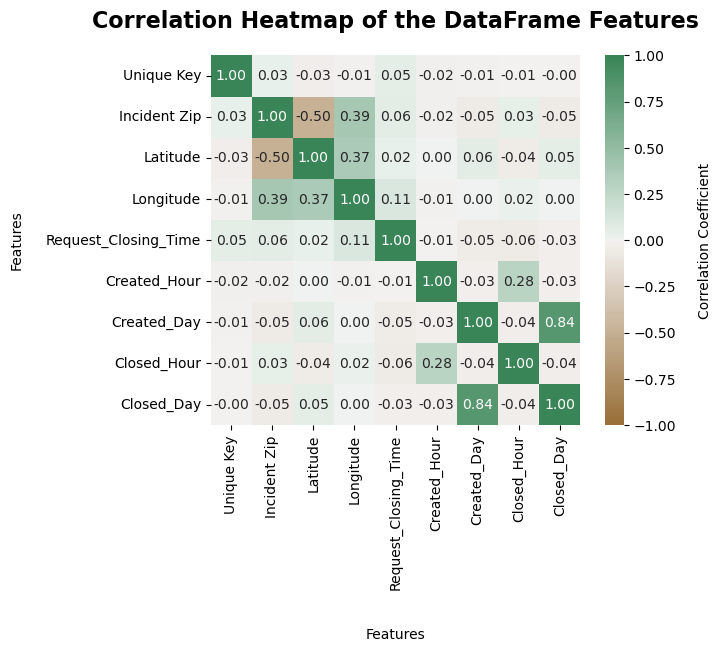

In [62]:
# Creating a heatmap to visualize the correlation matrix
axis_corr = sns.heatmap(
    correlation_matrix,
    vmin=-1, vmax=1, center=0,  # Setting the color scale range for correlation
    cmap=sns.diverging_palette(50, 500, n=500),  # Diverging color palette for better visualization
    square=True,  # Ensuring the heatmap is square-shaped
    annot=True, fmt='.2f',  # Displaying correlation values in the heatmap with 2 decimal places
    cbar_kws={'label': '\nCorrelation Coefficient'}  # Adding label to color bar
)

# Adding title and axis labels
plt.title("Correlation Heatmap of the DataFrame Features", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("\n\nFeatures")  # Label for x-axis
plt.ylabel("Features\n")  # Label for y-axis

# Displaying the heatmap
plt.show()

<h2>4.1. Provide four major insights through visualization that you come up after data mining.</h2>

<h3>4.1.1. Bar Chart for Top 10 Complaint Types</h3>

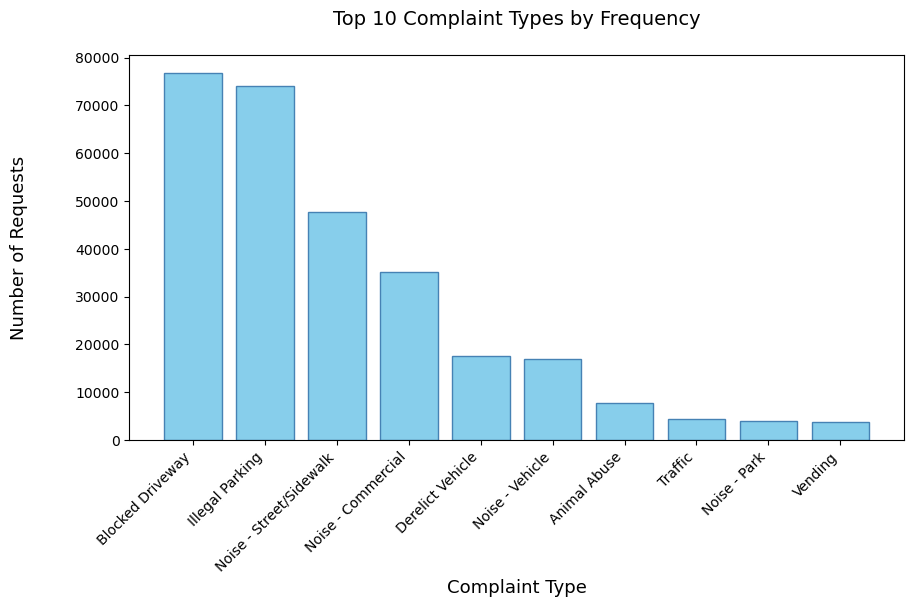

In [66]:
# Count complaint types and select top 10
top_complaints = df['Complaint Type'].value_counts().head(10)

# Bar Chart Plotting
plt.figure(figsize=(10, 5))
plt.bar(top_complaints.index, top_complaints.values, color='skyblue', edgecolor='steelblue')
plt.title('Top 10 Complaint Types by Frequency\n', fontsize=14)
plt.xlabel('Complaint Type', fontsize=13)
plt.ylabel('Number of Requests\n\n', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.show()

<h3>4.1.2. Pie Chart for Complaints Distribution by Borough</h3>

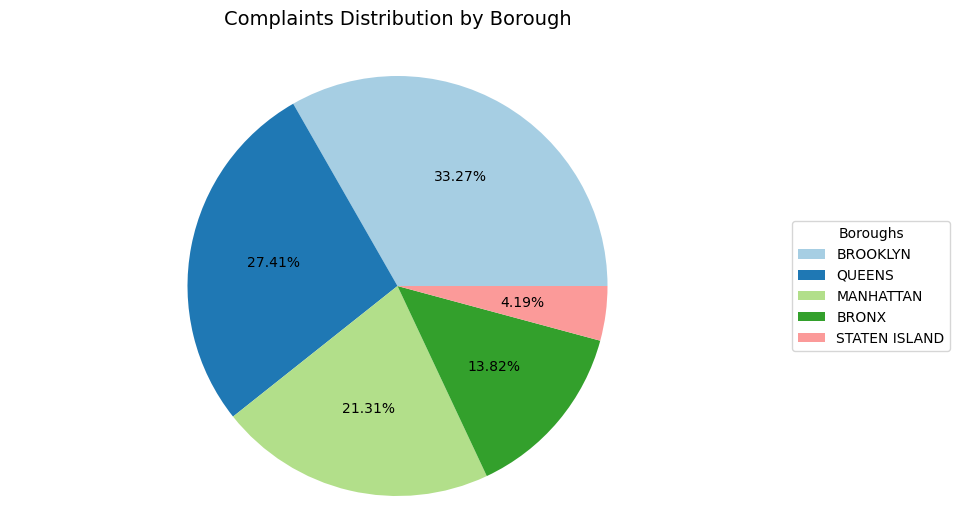

In [71]:
# Counting complaints per Borough
complaints_per_borough = df['Borough'].value_counts()

# Pie Chart Plotting
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(complaints_per_borough.values, autopct='%1.2f%%', colors=plt.cm.Paired.colors)
plt.title('Complaints Distribution by Borough\n', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(wedges, complaints_per_borough.index, title="Boroughs", loc="center left", bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.show()

<h3>4.1.3. Horizontal Bar Chart for Average Request Closing Time by Complaint Type</h3>

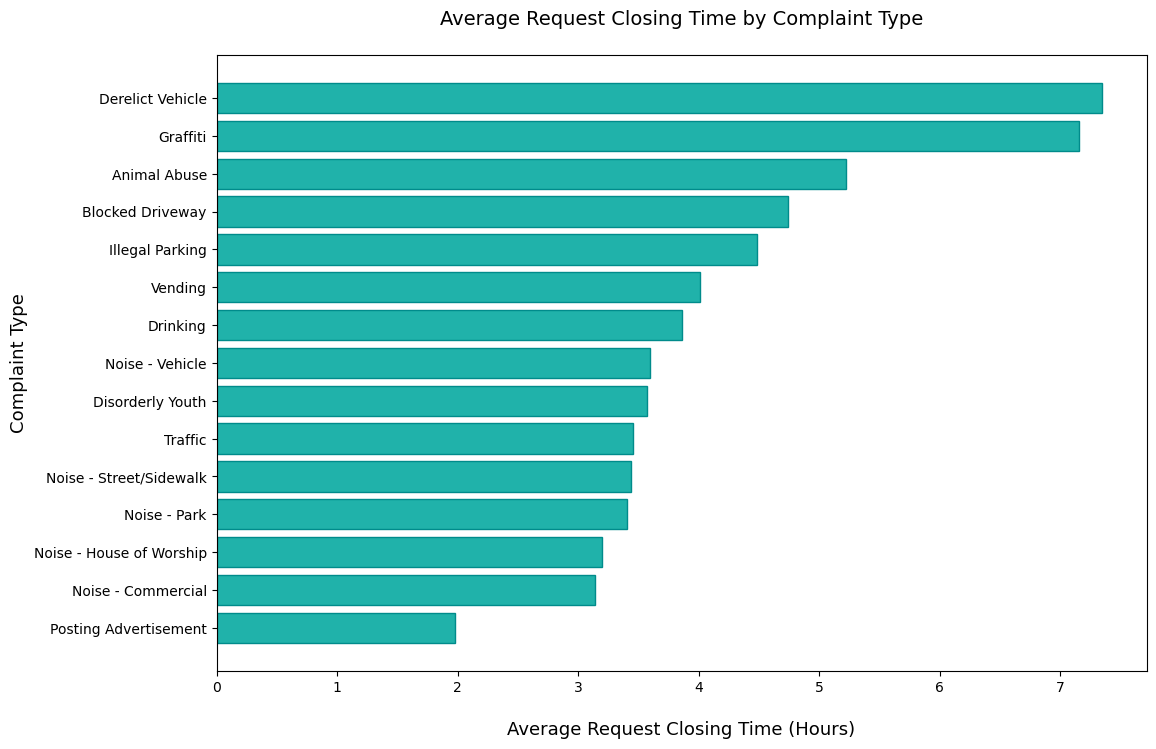

In [74]:
# Calculate closing time in hours
request_closing_time_hours = df['Request_Closing_Time'].dt.total_seconds() / 3600

# Grouping Average Closing Time per Complaint
avg_per_complaint = request_closing_time_hours.groupby(df['Complaint Type']).mean().sort_values(ascending=False)

# Plotting Horizontal Bar Chart
plt.figure(figsize=(12, 8))  
plt.barh(avg_per_complaint.index, avg_per_complaint.values, color='lightseagreen', edgecolor='darkcyan', height=0.8)
plt.title('Average Request Closing Time by Complaint Type\n', fontsize=14)
plt.xlabel('\nAverage Request Closing Time (Hours)', fontsize=13)
plt.ylabel('Complaint Type', fontsize=13)
plt.gca().invert_yaxis()
plt.show()

<h3>4.1.4 Monthly Trends of Top 5 Complaint Types</h3>

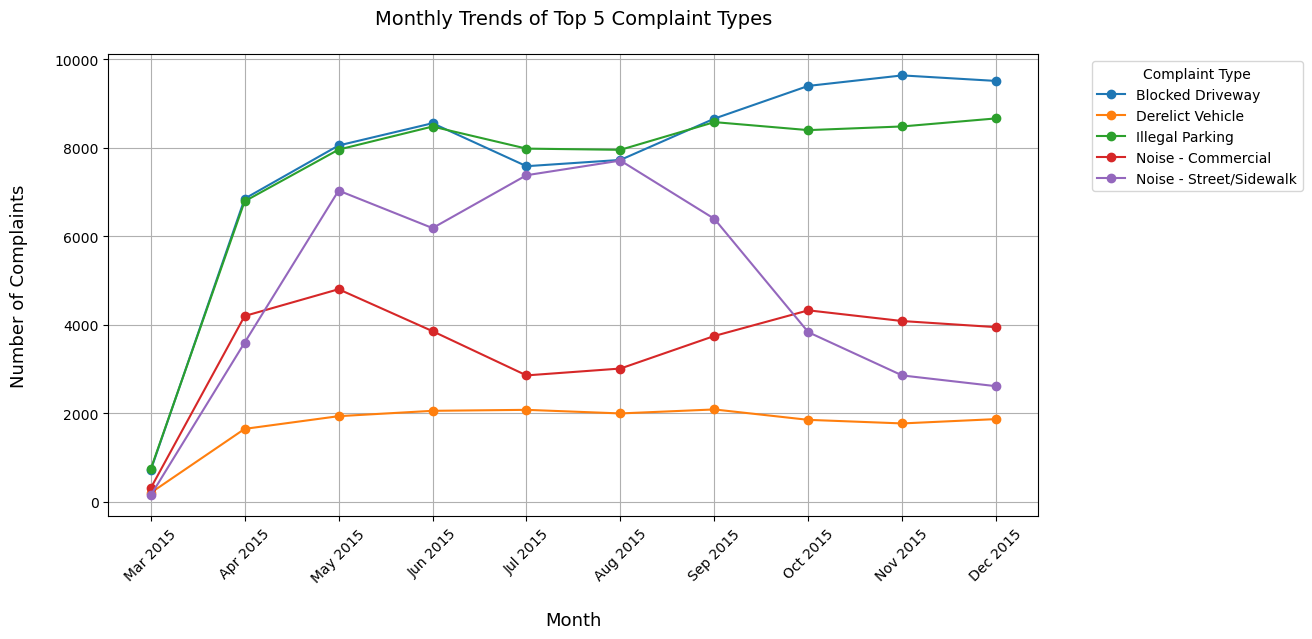

In [77]:
# Finding Top 5 Complaints
top5_complaints = df['Complaint Type'].value_counts().head(5).index

# Group by month and complaint type
complaints_by_type = df[df['Complaint Type'].isin(top5_complaints)].groupby(
    [df['Created Date'].dt.to_period('M'), df['Complaint Type']]
).size().unstack(fill_value=0)

# Formatting Months
months = complaints_by_type.index.to_timestamp().strftime('%b %Y')

# Plotting the line graph
plt.figure(figsize=(12, 6))

for col in complaints_by_type.columns:
    plt.plot(months, complaints_by_type[col], marker='o', linestyle='-', markersize=6, label=col)

plt.title('Monthly Trends of Top 5 Complaint Types\n', fontsize=14)
plt.xlabel('\nMonth', fontsize=13)
plt.ylabel('Number of Complaints\n', fontsize=13)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Complaint Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h2>4.2. Arrange the complaint types according to their average 'Request_Closing_Time', categorized by various locations. Illustrate it through graph as well.</h2>

In [80]:
# Calculating the average 'Request_Closing_Time' for each 'Location Type' and 'Complaint Type'
loca_per_comp_per_clos_df = df.groupby(['Location Type', 'Complaint Type'])['Request_Closing_Time'].mean().reset_index()

# Renaming columns for clarity
loca_per_comp_per_clos_df.columns = ['Location Type', 'Complaint Type', 'Average Closing Time']

# Sorting the DataFrame by 'Location Type' and 'Average Closing Time'
loca_per_comp_per_clos_df = loca_per_comp_per_clos_df.sort_values(by=['Location Type', 'Average Closing Time'])

# Creating a dictionary mapping each 'Location Type' to its complaint types and corresponding average closing time
location_dict = loca_per_comp_per_clos_df.groupby('Location Type')[['Complaint Type', 'Average Closing Time']].apply(lambda df: dict(df.values)).to_dict()

# Counting the unique 'Complaint Types' for each 'Location Type'
complaint_per_location = loca_per_comp_per_clos_df.groupby('Location Type')['Complaint Type'].nunique().reset_index()

# Renaming columns for the count DataFrame
complaint_per_location.columns = ['Location Type', 'Number of Complaint Types']

# Creating the final DataFrame combining 'Location Type', complaint details, and the number of complaint types
df_final = pd.DataFrame({
    'Location Type': complaint_per_location['Location Type'],
    'Complaint Types and Average Closing Time': [location_dict[loc_type] for loc_type in complaint_per_location['Location Type']],
    'Number of Complaint Types': complaint_per_location['Number of Complaint Types']
})

# Displaying the final DataFrame
df_final

,Location Type,Complaint Types and Average Closing Time,Number of Complaint Types
0,Club/Bar/Restaurant,{'Noise - Commercial': 0 days 03:03:45.4877729...,2
1,Commercial,{'Animal Abuse': 0 days 05:20:33.967741935},1
2,Highway,"{'Traffic': 0 days 03:24:29.273224043, 'Dereli...",2
3,House and Store,{'Animal Abuse': 0 days 05:00:47.741935483},1
4,House of Worship,{'Noise - House of Worship': 0 days 03:11:59.1...,1
5,Park/Playground,"{'Drinking': 0 days 03:21:22.458333333, 'Noise...",4
6,Parking Lot,{'Posting Advertisement': 0 days 02:06:56.7142...,2
7,Residential Building,{'Animal Abuse': 0 days 04:49:33.853982300},1
8,Residential Building/House,{'Posting Advertisement': 0 days 03:36:01.8333...,6
9,Roadway Tunnel,"{'Traffic': 0 days 02:10:37.379310344, 'Dereli...",2


<h3>Mulitple Column Chart</h3>

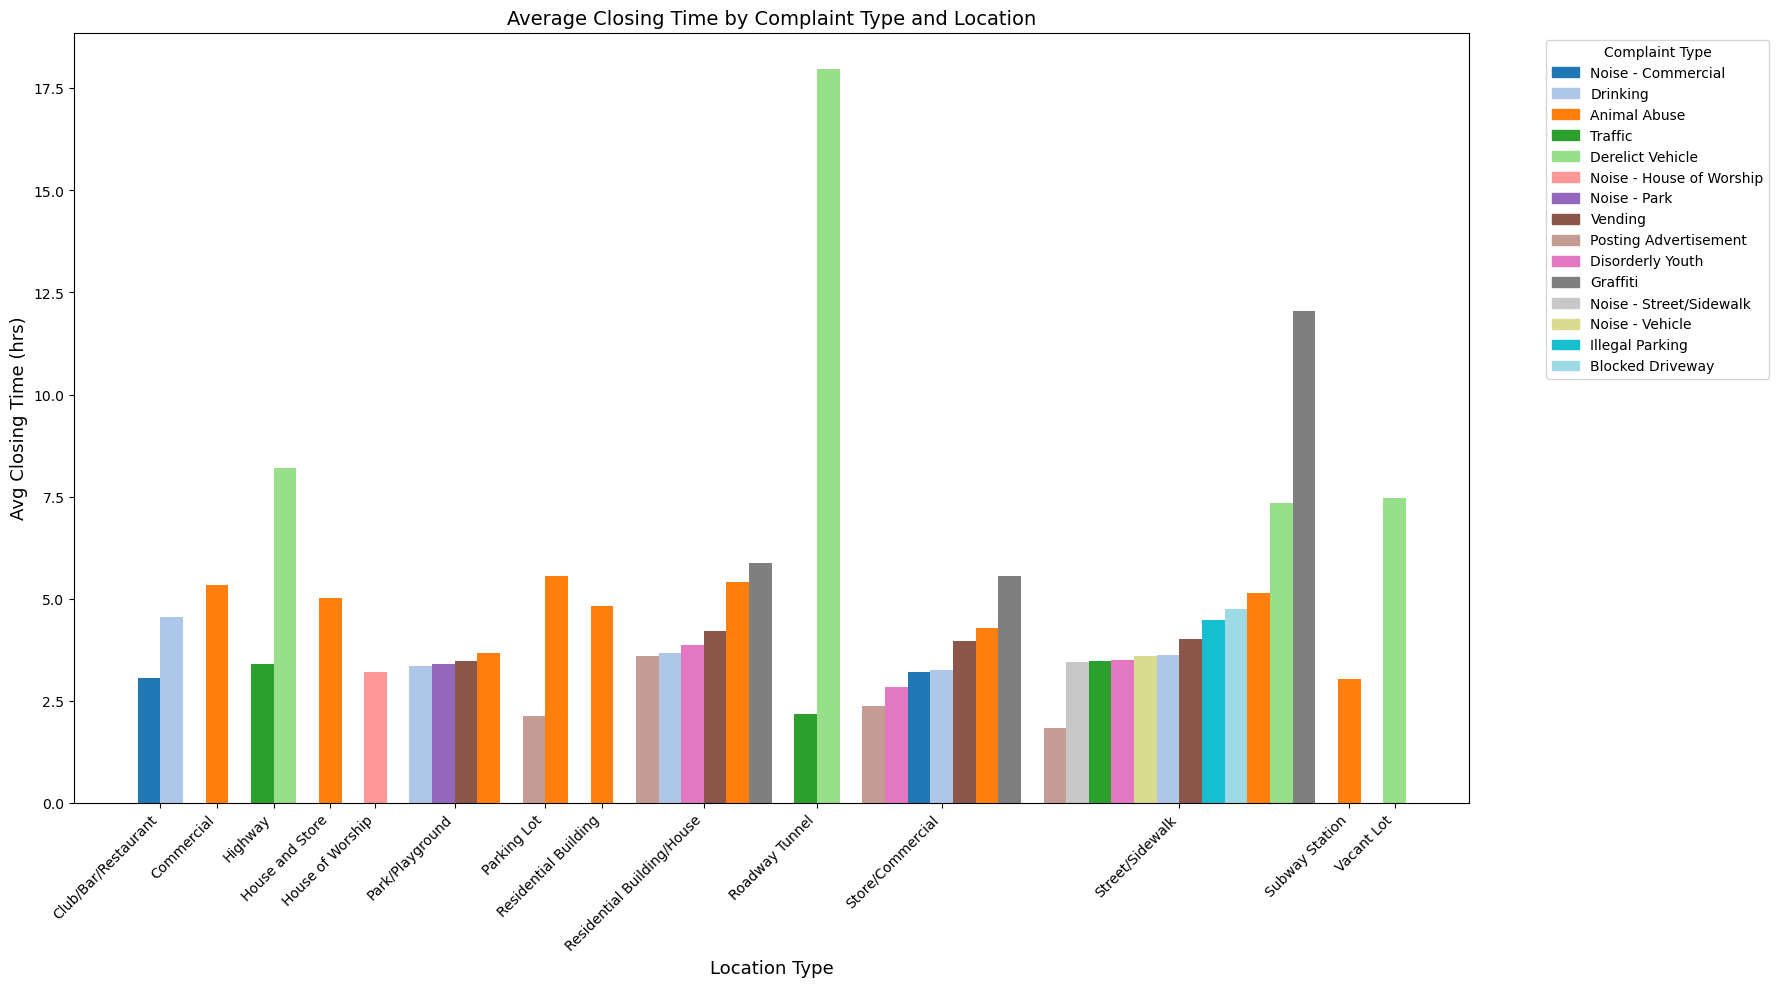

In [83]:
# Set up the figure with a specified size
plt.figure(figsize=(18, 10))
ax = plt.gca()

# Converting Average Closing Time into Hours
loca_per_comp_per_clos_df['Average Closing Time (hrs)'] = loca_per_comp_per_clos_df['Average Closing Time'].dt.total_seconds()/3600

# Get unique complaint types and assign colors from the tab20 colormap
unique_complaints = loca_per_comp_per_clos_df['Complaint Type'].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_complaints)))
complaint_to_color = dict(zip(unique_complaints, colors))

# Group the data by 'Location Type'
grouped = loca_per_comp_per_clos_df.groupby('Location Type')

# Variables for x-axis positions and labels
current_x = 0
gap = 1  # Space between different 'Location Types'
tick_positions = []
tick_labels = []

# Plot bars for each 'Location Type'
for location, group in grouped:
    n = len(group)  # Number of complaint types in the current location
    x_positions = np.arange(current_x, current_x + n)  # Assign consecutive x-positions for bars
    # Plot each complaint type's bar
    for idx, (_, row) in enumerate(group.iterrows()):
        complaint = row['Complaint Type']
        time = row['Average Closing Time (hrs)']
        color = complaint_to_color[complaint]
        ax.bar(x_positions[idx], time, width=1, color=color)
    # Calculate the x-position for the tick (center of the current group of bars)
    tick_pos = current_x + (n - 1) / 2.0
    tick_positions.append(tick_pos)
    tick_labels.append(location)
    # Move to the next location type, adding a gap between groups
    current_x += n + gap

# Customize x-axis with position and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, ha='right')

# Add legend for 'Complaint Type' with assigned colors
handles = [plt.Rectangle((0,0),1,1, color=complaint_to_color[c]) for c in unique_complaints]
ax.legend(handles, unique_complaints, title="Complaint Type", bbox_to_anchor=(1.05, 1), loc="upper left")

# Set axis labels and the title of the chart
ax.set_ylabel("Avg Closing Time (hrs)", fontsize=13)
ax.set_xlabel("Location Type", fontsize=13)
ax.set_title("Average Closing Time by Complaint Type and Location", fontsize=14)

# Display the Graph
plt.show()

<h2>5.1. Test 1: Whether the average response time across complaint types is similar or not.<br>
    •	State the Null Hypothesis (H0) and Alternate Hypothesis (H1).<br>
    •	Perform the statistical test and provide the p-value.<br>
    •	Interpret the results to accept or reject the Null Hypothesis.<br>
</h2>

In [86]:
# Making a copy of dataframe
df_test1 = df.copy()

# Converting request closing time into seconds and storing it in a new columns
df_test1['response_time_sec'] = df_test1['Request_Closing_Time'].dt.total_seconds()

# Grouping response_time_sec by Complaint Type
groups = [group['response_time_sec'].values for name, group in df_test1.groupby('Complaint Type')]

# Computinf the Anova one way test
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.2f}")

# Significance Value
α = 0.05

# Checking the p-value
if p_value < α:
    print('Reject the Null Hypothesis: The average response time is same across complaint types')  
else:  
    print('Failed to Reject the Null Hypothesis: The average response time is not same across complaint types.')

F-statistic: 578.91
P-value: 0.00
Reject the Null Hypothesis: The average response time is same across complaint types


<h2>5.2. Test 2: Whether the type of complaint or service requested, and location are related.<br>
•	State the Null Hypothesis (H0) and Alternate Hypothesis (H1).<br>
•	Perform the statistical test and provide the p-value.<br>
•	Interpret the results to accept or reject the Null Hypothesis.<br>
</h2>

In [89]:
# Creating Contigency Table
contingency = pd.crosstab(df['Complaint Type'], df['Location Type'])

# Performing chi-square test  
test, p_val, dof, expected_val = chi2_contingency(contingency)  

# interpreting the p-value  
print(f"Chi_test: {test}")
print(f"The p-value is: {p_val:.2f}")

# Significance Value
α = 0.05

# Checking the p-value
if p_value < α: 
    print('Reject the Null Hypothesis: Type of complaint or service requested and location are independent of each other.')  
else:  
    print('Failed to Reject the Null Hypothesis: Type of complaint or service requested and location are not independent of each other.')

Chi_test: 1049203.872020897
The p-value is: 0.00
Reject the Null Hypothesis: Type of complaint or service requested and location are independent of each other.
